In [30]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

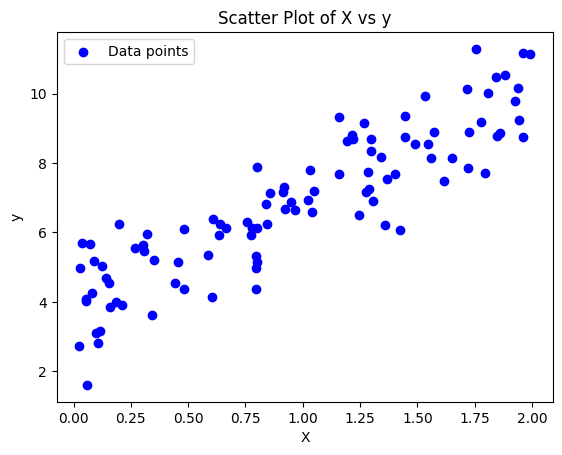

In [31]:
# Plot the data
plt.scatter(X, y, color="blue", label="Data points")  # Scatter plot
plt.xlabel("X")  # Label for X-axis
plt.ylabel("y")  # Label for Y-axis
plt.title("Scatter Plot of X vs y")  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [32]:
# Compute theta using the Normal Equation

X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instace
theta_best = (np.linalg.inv(X_b.T.dot(X_b))).dot(X_b.T).dot(y)

In [33]:
theta_best

array([[3.87032089],
       [3.07553263]])

In [34]:
# making predictions using theta_best

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.87032089],
       [10.02138615]])

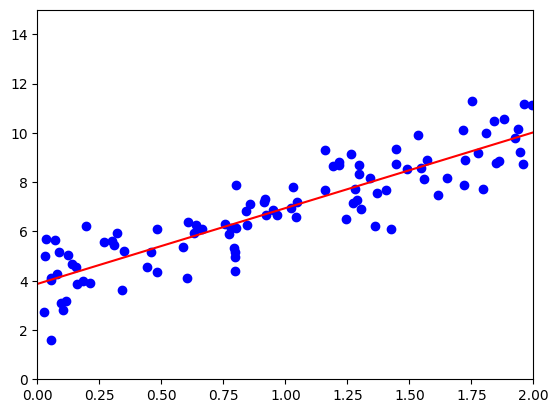

In [35]:
# plotting model's predictions

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(X, y, color="blue", label="Data points")
plt.axis([0, 2, 0, 15])
plt.show()

In [36]:
# linear regression using Scikit-Learn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.87032089]), array([[3.07553263]]))

In [37]:
lin_reg.predict(X_new)

array([[ 3.87032089],
       [10.02138615]])

In [38]:
# LinearRegression class is based on the scipy.linalg.lstsq() function (least squares), which you can call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.87032089],
       [3.07553263]])

In [39]:
residuals

array([91.95746751])

In [40]:
rank

2

In [41]:
# using np.linalg.pinv() to compute the pseudoinverse directly

np.linalg.pinv(X_b).dot(y)

array([[3.87032089],
       [3.07553263]])

In [42]:
# implementation of batch gradient descent

alpha = 0.1 #learning rate
n_iterations = 1000
m = 100 #number of examples

theta = np.random.randn(2,1) #random initializatiom

for iteration in range(n_iterations):
    gradients = (2/m) * (X_b.T).dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

theta

array([[3.87032089],
       [3.07553263]])

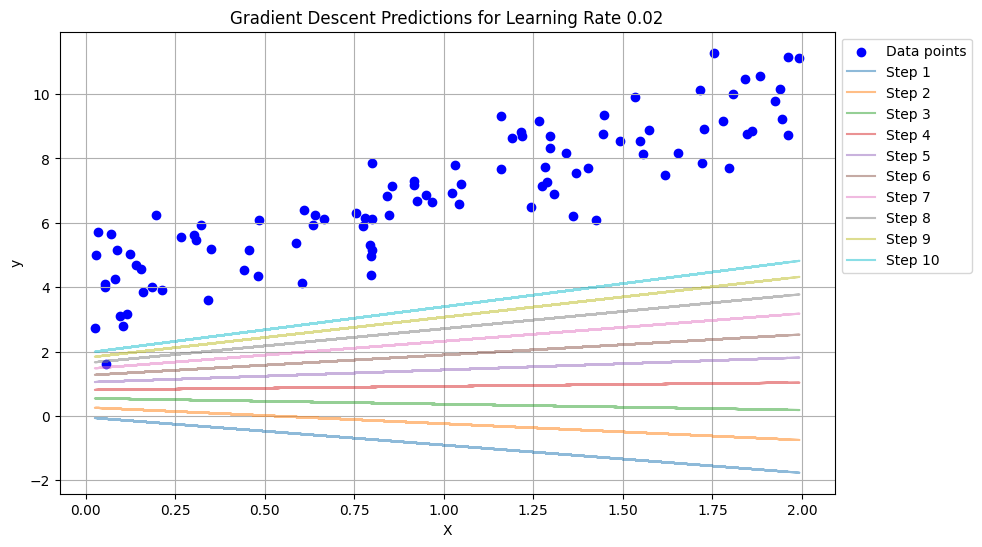

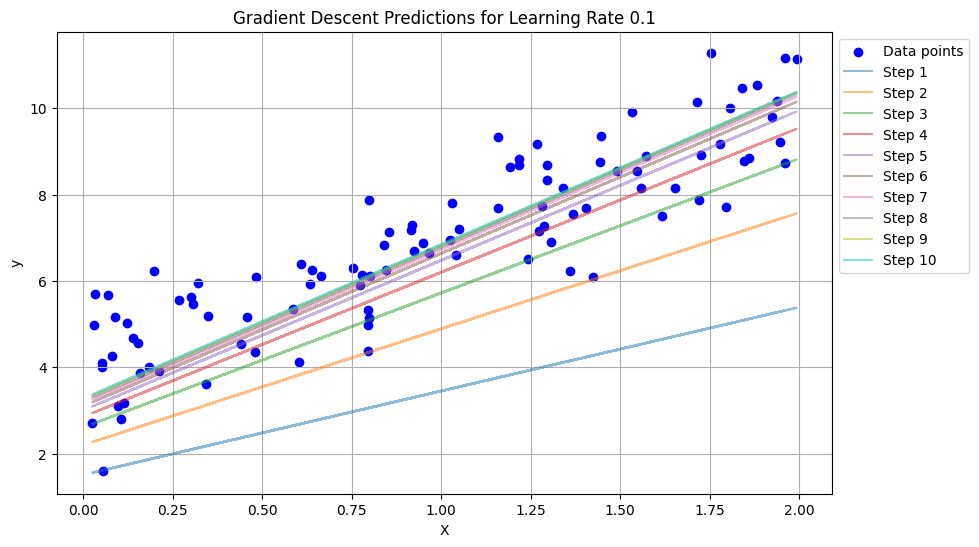

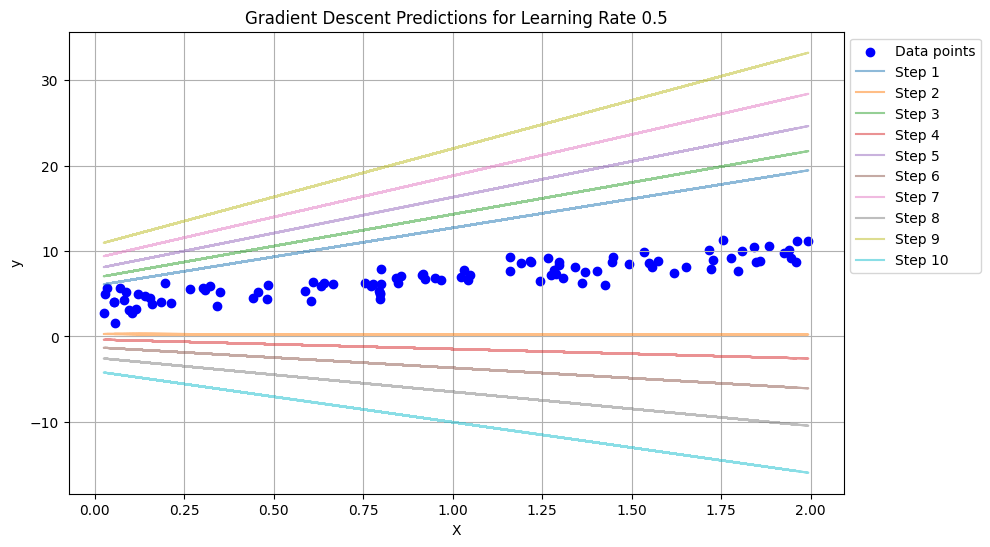

In [43]:
learning_rates = [0.02, 0.1, 0.5]
n_iterations = 10  # First 10 steps
m = 100  # Number of examples

for learning_rate in learning_rates:
    theta = np.random.randn(2, 1)  # Random initialization

    # Initialize the plot for the current learning rate
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color="blue", label="Data points")  # Original data points

    for iteration in range(n_iterations):
        # Compute gradients and update theta
        gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

        # Plot the predictions at each step
        y_predict = X_b.dot(theta)  # Predictions
        plt.plot(X, y_predict, label=f"Step {iteration + 1}", alpha=0.5)

    # Add labels, title, and legend
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Gradient Descent Predictions for Learning Rate {learning_rate}")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

In [44]:
# Implementation of stochastic gradient descent

n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparams

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * m + i)
        theta = theta - alpha * gradients


In [45]:
theta

array([[3.92507886],
       [3.05405612]])

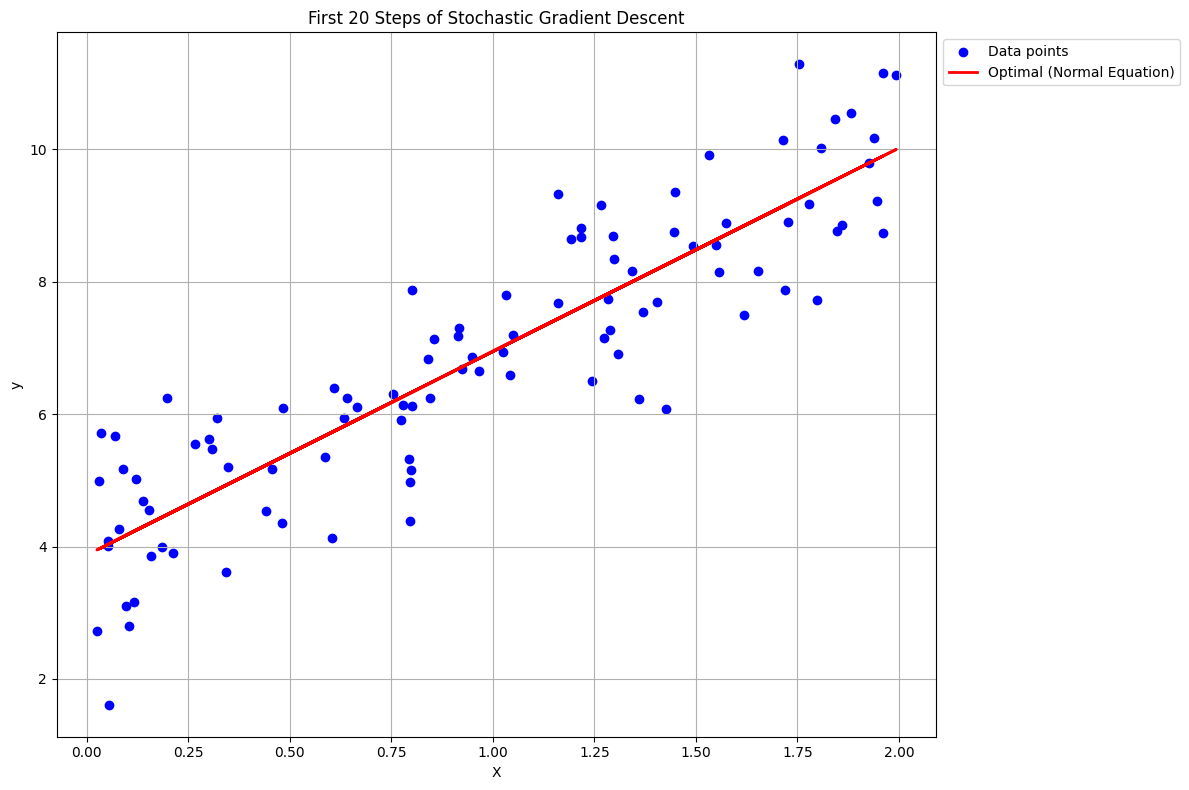

In [47]:
n_epochs = 1  # We need just enough epochs to get 20 steps
t0, t1 = 5, 50  # Learning schedule hyperparams

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # Random initialization
theta_path = [theta.copy()]  # To store theta history

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color="blue", label="Data points")

steps = 0
for epoch in range(n_epochs):
    for i in range(m):
        if steps >= 20:  # Stop after 20 steps
            break

# Calculate predictions using the optimal parameters for comparison
y_predict_optimal = X_b.dot(theta_best)
plt.plot(X, y_predict_optimal, 'r-', linewidth=2, label="Optimal (Normal Equation)")

plt.xlabel("X")
plt.ylabel("y")
plt.title("First 20 Steps of Stochastic Gradient Descent")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()

In [48]:
# Implementation of stochastic gradient descent with shuffling

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparams

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    # Create a random permutation of indices for the training set
    indices = np.random.permutation(m)
    
    # Go through the training set instance by instance
    for i in range(m):
        # Get the index for the current instance
        index = indices[i]
        
        # Select the instance and its target value
        xi = X_b[index:index+1]
        yi = y[index:index+1]
        
        # Compute gradient for this instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        # Update learning rate using the schedule
        alpha = learning_schedule(epoch * m + i)
        
        # Update parameters
        theta = theta - alpha * gradients

In [49]:
# implementing SGD using Scikit learn

from sklearn.linear_model import SGDRegressor

# tol=1e-3 means the loss drops by less than 0.001 during one epoch
# learning rate starts at 0.1
# penalty=None : doesn't use any regularization
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [50]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87295206]), array([3.07137863]))